In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [3]:
cd ..\experiments\data\human\0.991

C:\Users\piichan\Documents\Berkeley\CoCoSci Lab\mcrl\mcrl\experiments\data\human\0.991


In [4]:
df=pd.read_csv('survey-text.csv', sep=',',header=None)
df.values

array([['p_rdata', 'action_times', 'actions', ..., 'trial_type',
        'view_history', 'pid'],
       [nan, nan, nan, ..., 'survey-text', nan, '0'],
       [nan, nan, nan, ..., 'survey-text', nan, '1'],
       ..., 
       [nan, nan, nan, ..., 'survey-text', nan, '103'],
       [nan, nan, nan, ..., 'survey-text', nan, '104'],
       [nan, nan, nan, ..., 'survey-text', nan, '105']], dtype=object)

In [4]:
responses = df[13]
ages = []

for response in responses[1:]:
    elements = response.split('"')
    if elements[11] == 'Q2':
        age = elements[13]
    else:
        age = elements[11]
    age = int(age)
    ages.append(age)

np.sort(ages)

array([19, 21, 21, 21, 22, 23, 23, 24, 25, 26, 26, 26, 26, 26, 27, 27, 28,
       28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31,
       31, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35,
       36, 36, 38, 38, 39, 39, 40, 40, 42, 42, 42, 43, 43, 43, 43, 44, 45,
       46, 46, 46, 46, 46, 47, 47, 48, 48, 48, 48, 48, 48, 50, 50, 53, 53,
       56, 56, 58, 58, 63, 63, 64, 64, 68, 68, 68])

(array([ 1.,  0.,  3.,  1.,  2.,  1.,  1.,  5.,  2.,  3.,  5.,  4.,  7.,
         1.,  6.,  6.,  3.,  2.,  0.,  2.,  2.,  2.,  0.,  3.,  4.,  1.,
         1.,  5.,  2.,  6.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,
         2.,  0.,  0.,  0.,  0.,  2.,  2.,  0.,  0.,  3.]),
 array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]),
 <a list of 49 Patch objects>)

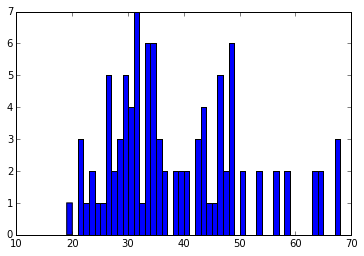

In [5]:
plt.figure()
plt.hist(ages, bins=np.arange(np.min(ages), np.max(ages)+1))

In [28]:
df[21]

0     pid
1       0
2       1
3       2
4       3
5       4
6       5
7       6
8       7
9       8
10      9
11     10
12     11
13     12
14     13
...
82     90
83     92
84     93
85     94
86     95
87     96
88     97
89     98
90     99
91    100
92    101
93    102
94    103
95    104
96    105
Name: 21, Length: 97, dtype: object

In [46]:
responses0 = df[13]
strategies = []
pids = []
# Grabs the text responses to the question "What was your planning strategy?"
for i in np.arange(responses0.size - 1):
    response = responses0[i+1]
    pid = int(df[21][i+1])
    pids.append(pid)
    elements = response.split('","')
    text = elements[0][7:]
    strategies.append(text)

strat = pd.DataFrame(pids, columns=['pid'])
strat['Verbal Report'] = strategies
strat

,pid,Verbal Report
0,0,I looked at a few circles and made educational...
1,1,I tried to show just enough location prizes to...
2,2,I tried different methods none seemed to work ...
3,3,I tried the nearest locations first because if...
4,4,Tried to follow the paths with the most positi...
5,5,"i didn't plan at all in the first few rounds, ..."
6,6,Just picked random spots
7,7,totally random
8,8,I like to have options so I tried to reveal as...
9,9,i found a profitable route and took it


In [75]:
trialsdf=pd.read_csv('trials.csv', sep=',')
indv_means = trialsdf.groupby(['pid', 'info_cost']).mean()['score']
cost_averages = trialsdf.groupby(['info_cost']).mean()